In [1]:
import pyforest
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Data/data.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Droping the un-necessary column
df.drop(columns = ['Unnamed: 32','id'], axis = 1, inplace=True)

# Data Exploration

In [5]:
# Shape of the dataset
df.shape

(569, 31)

In [6]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

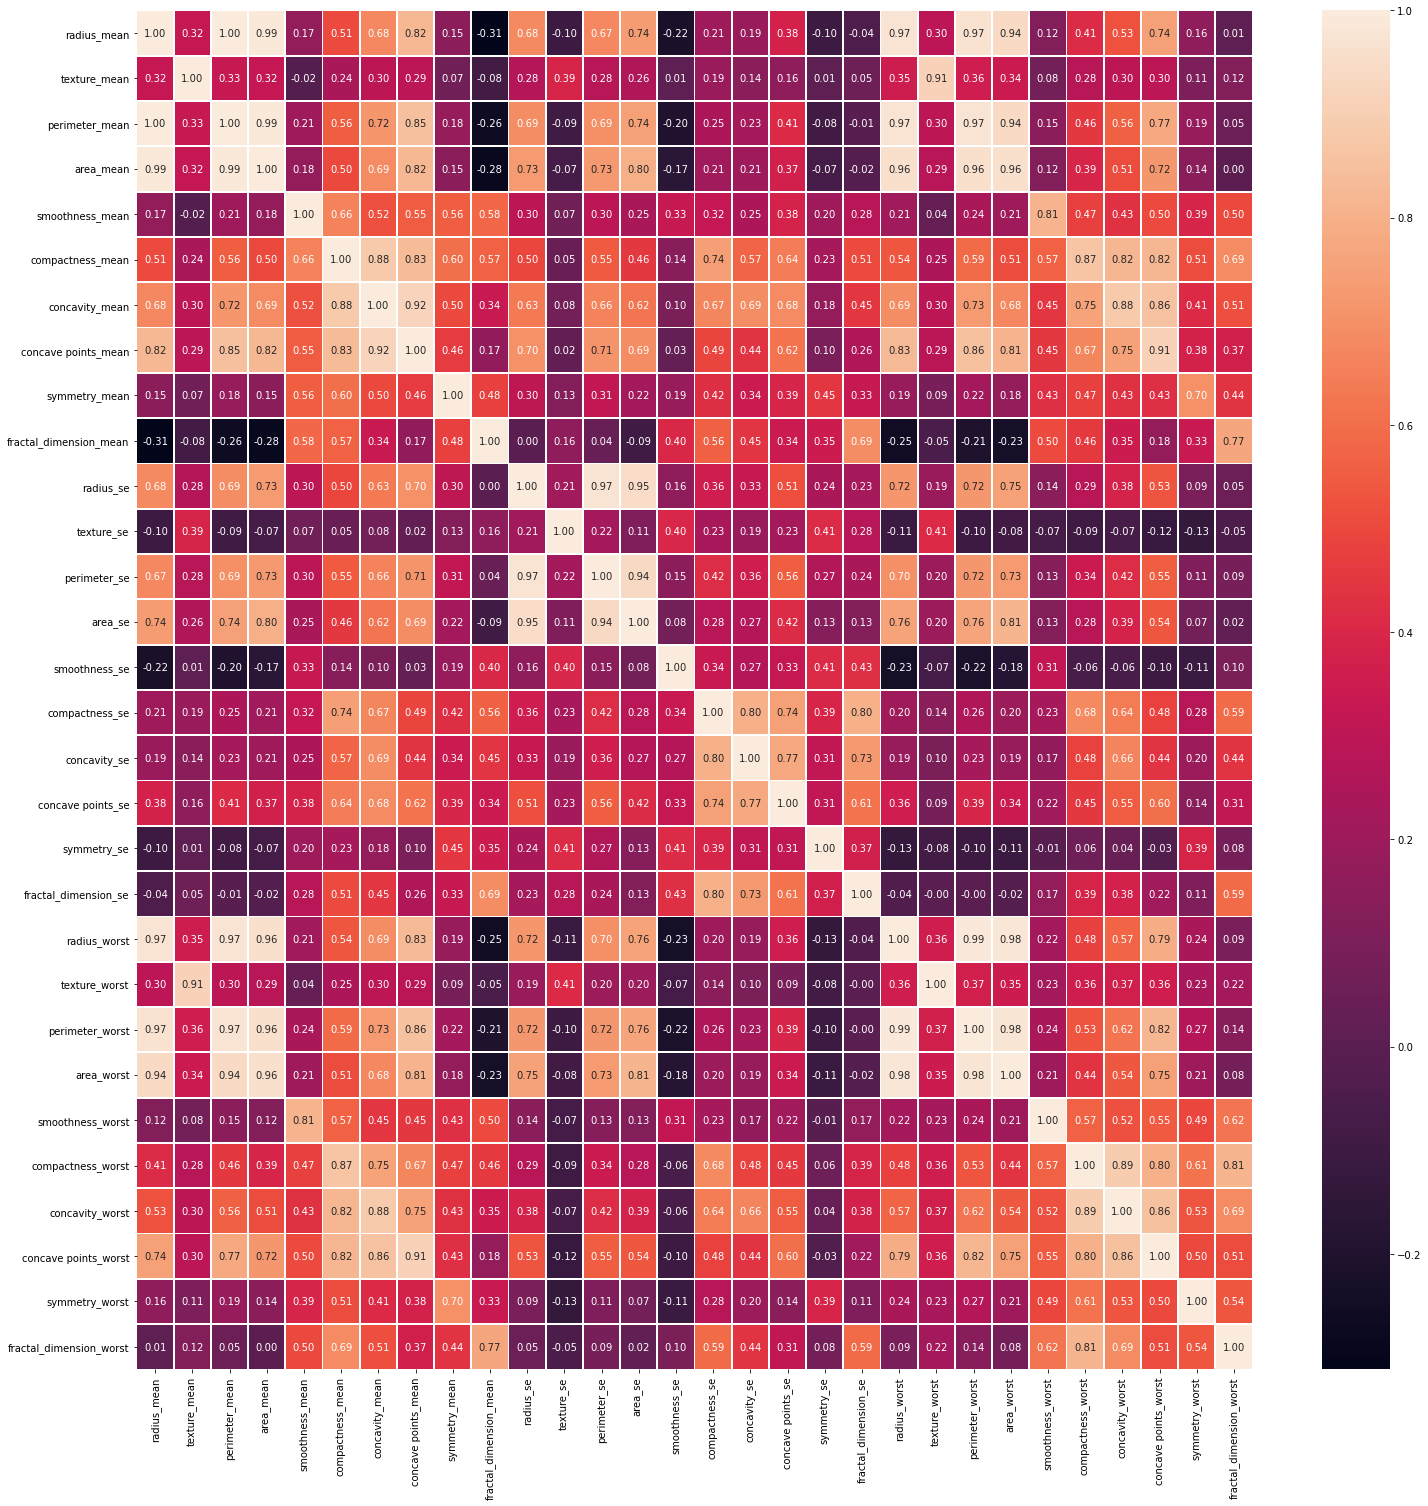

In [10]:
# plotting the corelation among the variables
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, linewidths=0.8, fmt = '0.2f')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

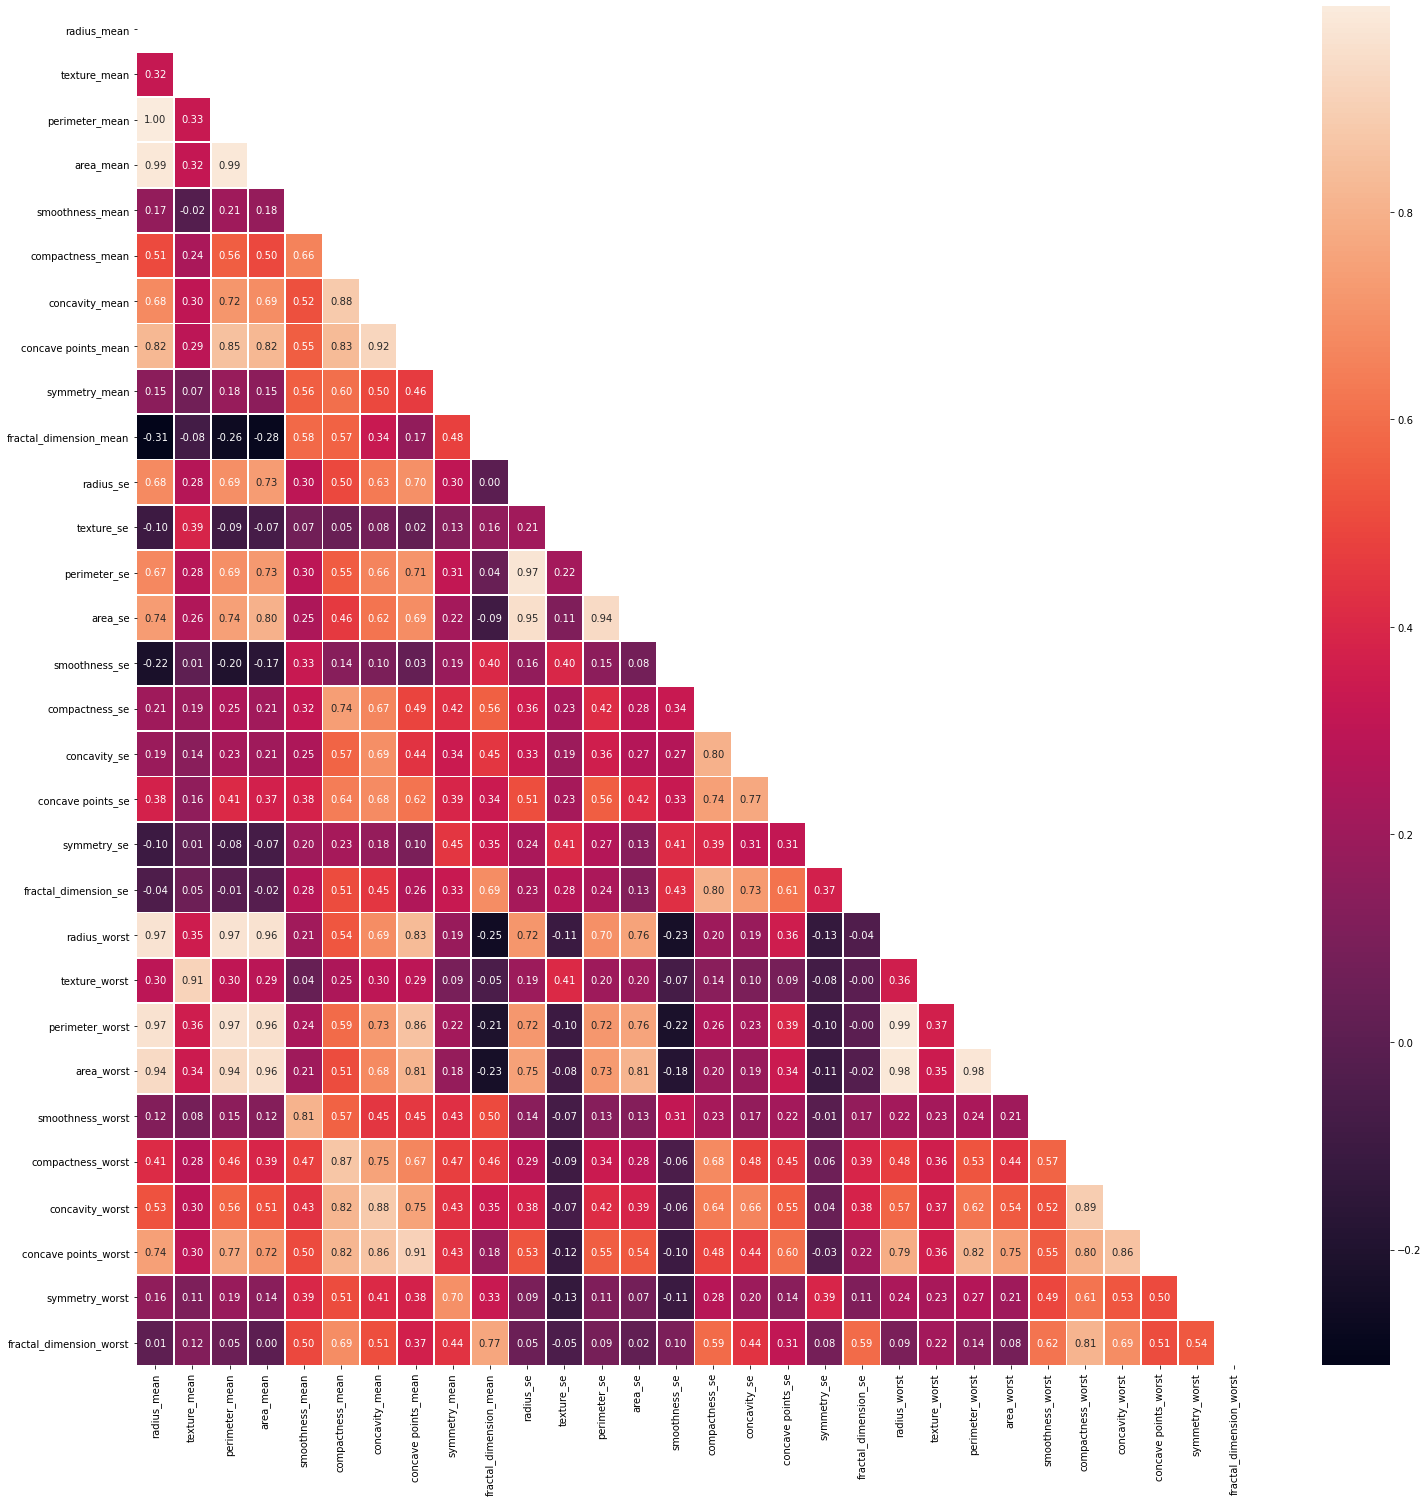

In [11]:
# plotting the corelation for the lower half

corr = df.corr()
upperD = np.triu(corr)
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, linewidths=0.8, fmt = '0.2f', mask = upperD)
plt.show()

In [12]:
# Univariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

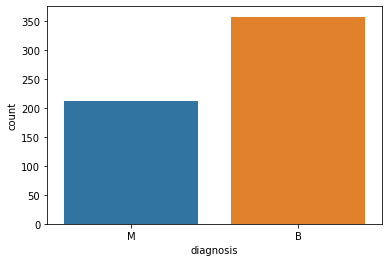

In [13]:
sns.countplot(data = df, x = 'diagnosis')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

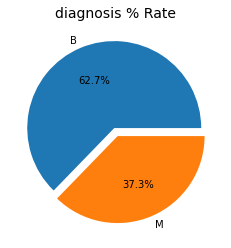

In [14]:
diagnosisCount = df.groupby('diagnosis')['diagnosis'].count()

plt.title("diagnosis % Rate", fontsize=14);
plt.pie(diagnosisCount, autopct= '%.1f%%', labels=['B', 'M'], explode=[0.05]*len(df['diagnosis'].unique()))
plt.show()

In [15]:
def colorSel():
  r = random.random()
  b = random.random()
  g = random.random()
  color = (r, g, b)
  return color

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

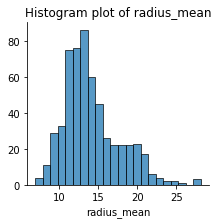

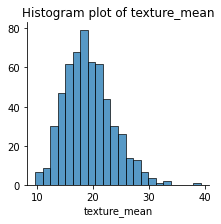

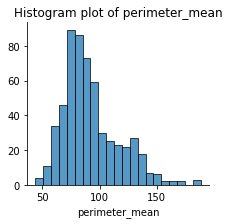

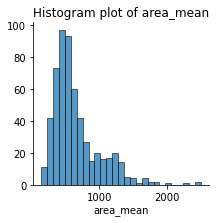

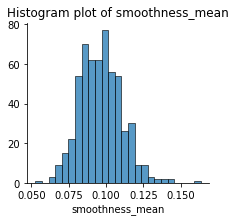

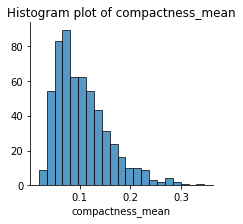

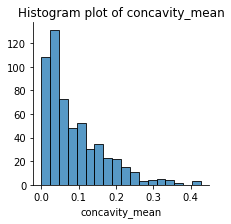

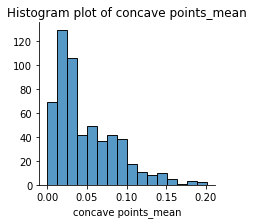

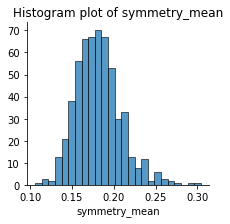

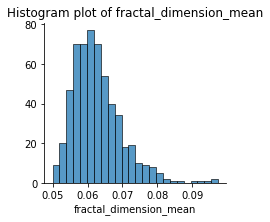

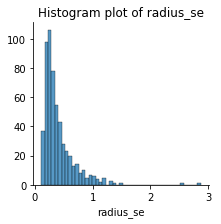

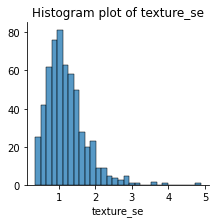

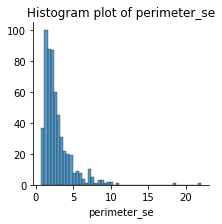

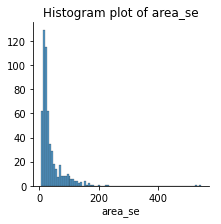

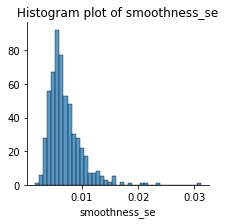

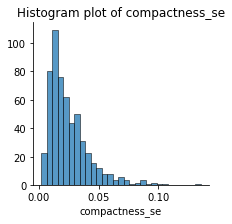

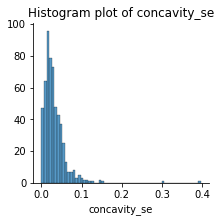

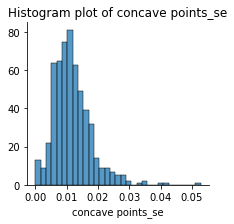

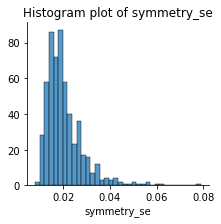

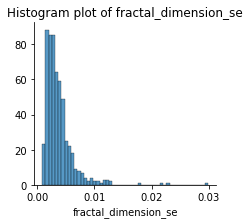

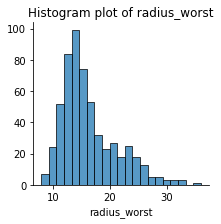

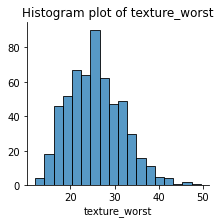

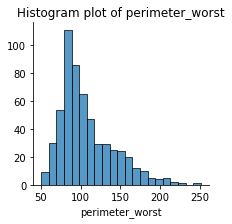

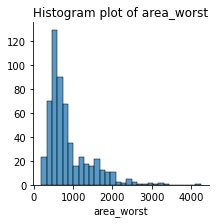

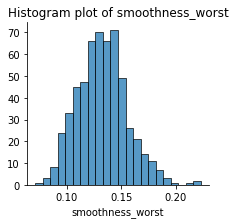

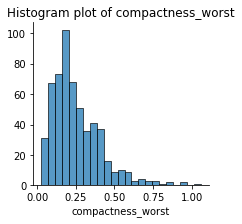

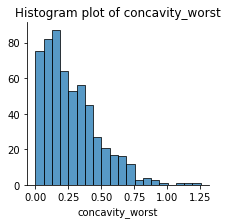

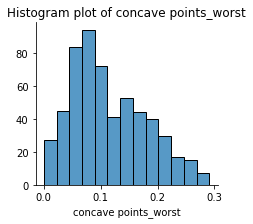

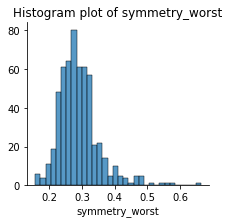

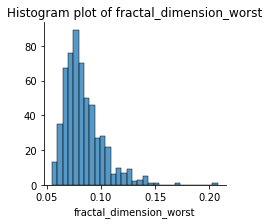

In [17]:
for i in df.columns:
    if i != 'diagnosis':
        col = colorSel()
        sns.FacetGrid(df).map(sns.histplot,i).add_legend()
        #sns.histplot(df, x = i)
        plt.title('Histogram plot of '+i);
      #sns.distplot(df[i], color = col, kde =True);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

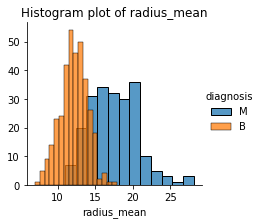

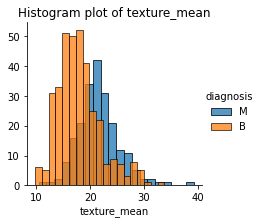

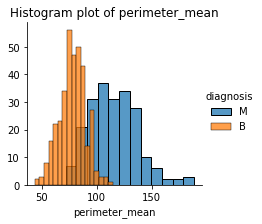

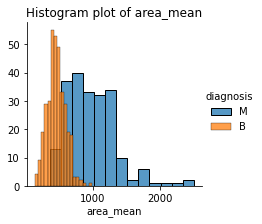

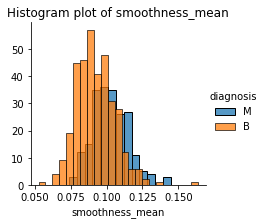

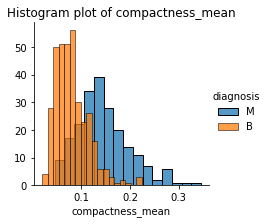

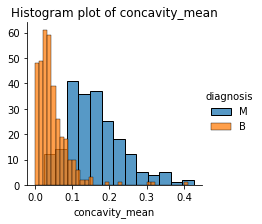

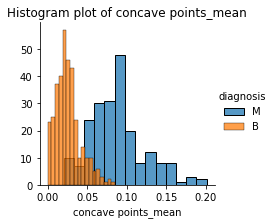

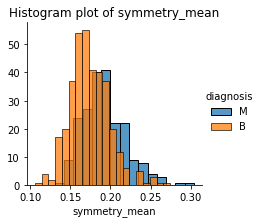

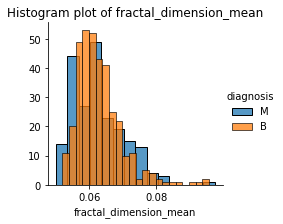

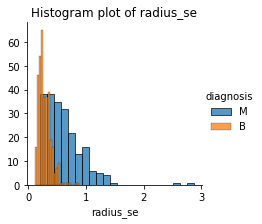

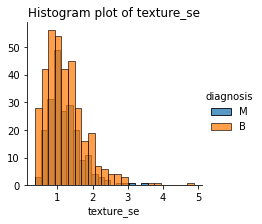

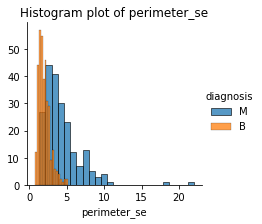

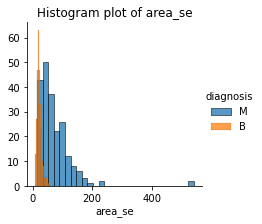

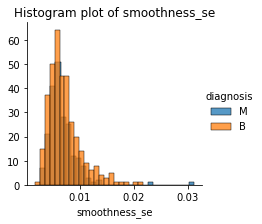

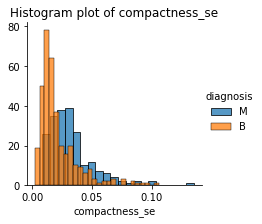

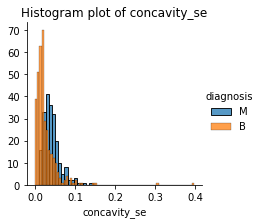

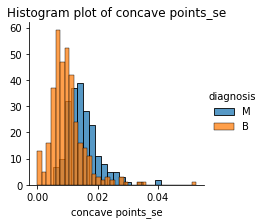

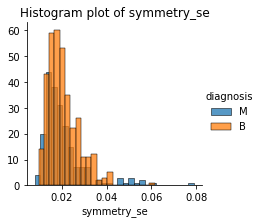

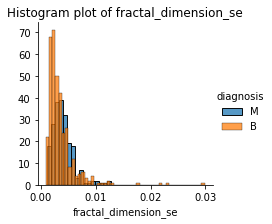

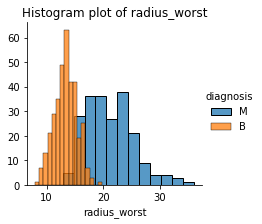

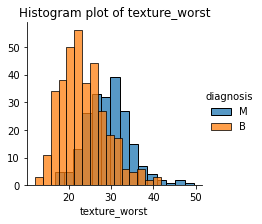

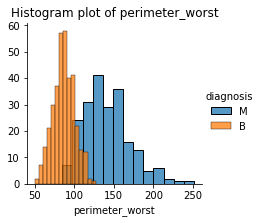

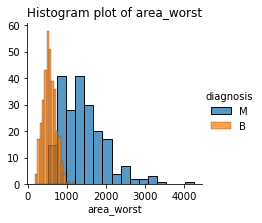

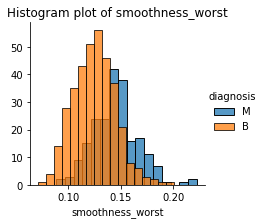

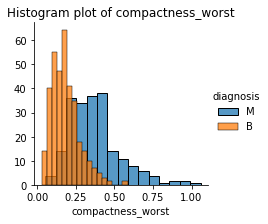

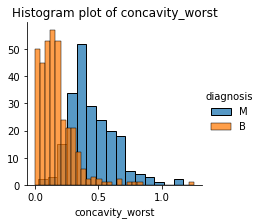

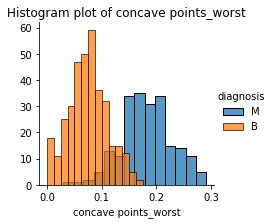

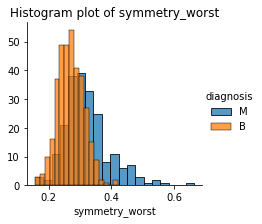

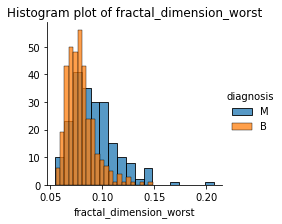

In [18]:
for i in df.columns:
    if i != 'diagnosis':
        col = colorSel()
        sns.FacetGrid(df, hue = 'diagnosis').map(sns.histplot,i).add_legend()
        #sns.histplot(df, x = i)
        plt.title('Histogram plot of '+i);
      #sns.distplot(df[i], color = col, kde =True);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

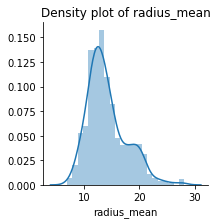

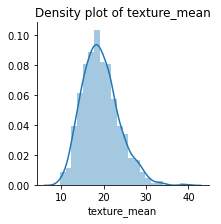

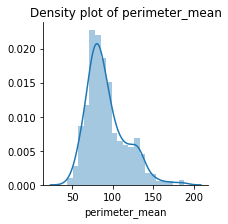

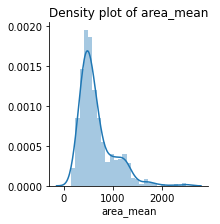

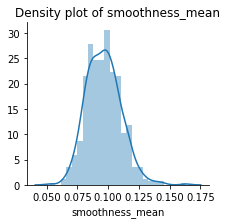

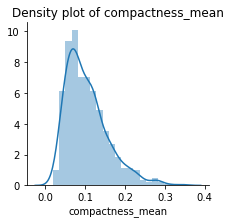

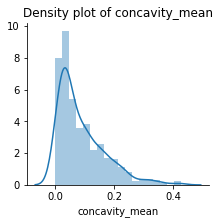

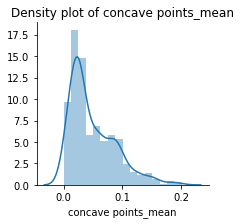

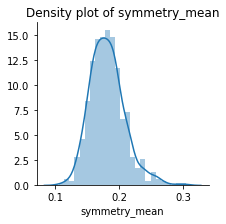

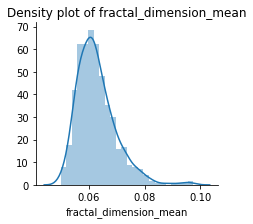

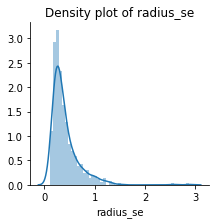

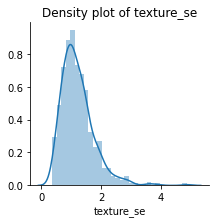

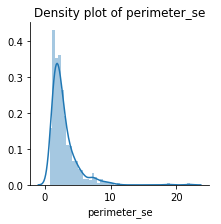

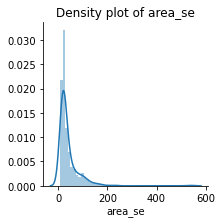

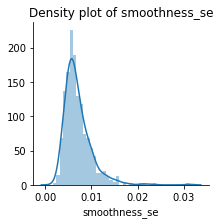

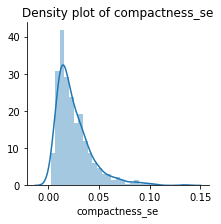

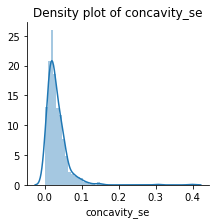

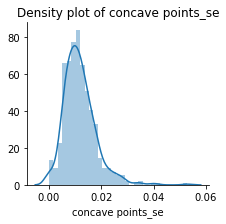

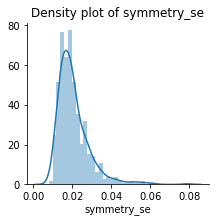

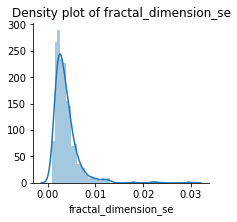

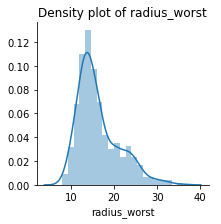

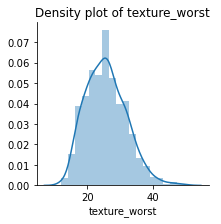

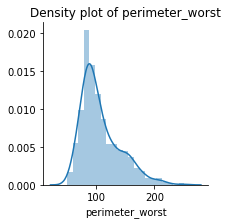

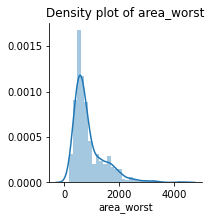

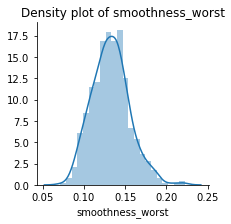

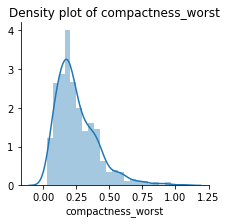

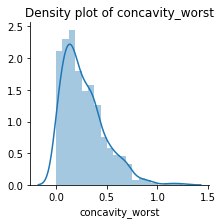

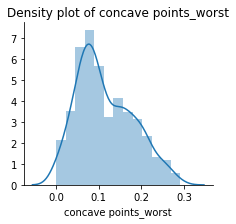

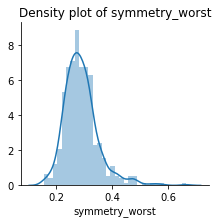

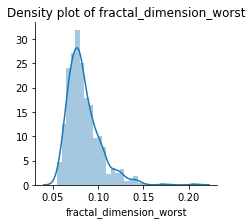

In [19]:
for i in df.columns:
    if i != 'diagnosis':
        col = colorSel()
        sns.FacetGrid(df).map(sns.distplot, i).add_legend()
        plt.title('Density plot of '+i);
      #sns.distplot(df[i], color = col, kde =True);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

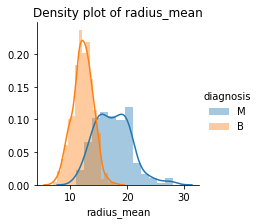

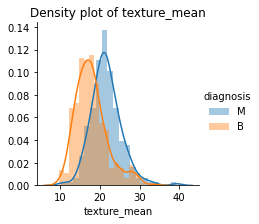

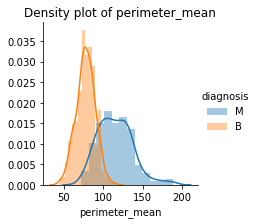

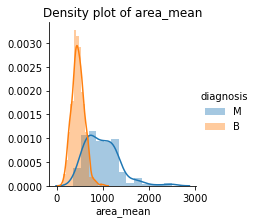

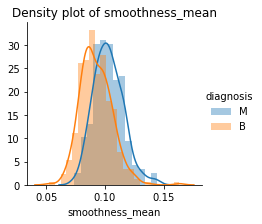

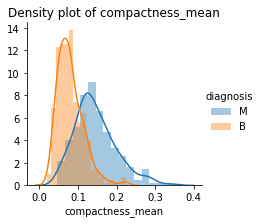

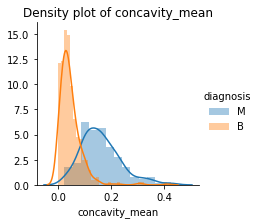

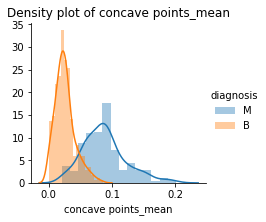

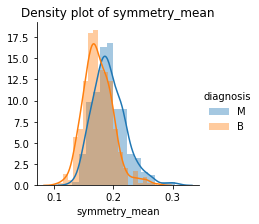

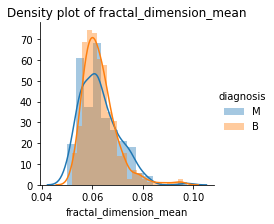

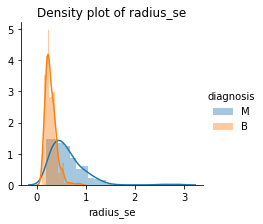

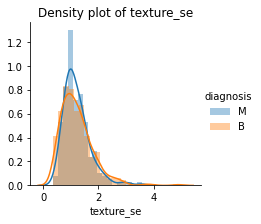

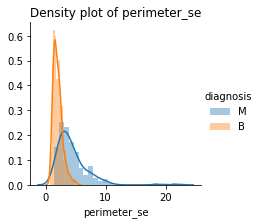

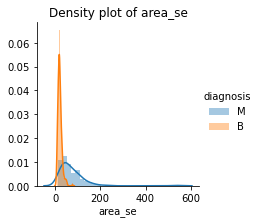

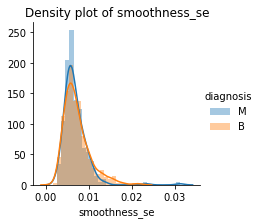

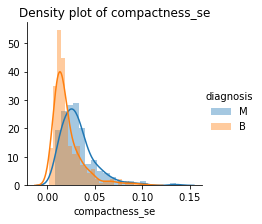

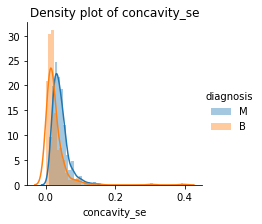

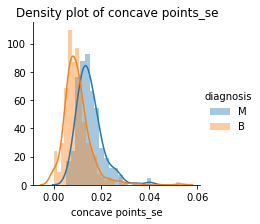

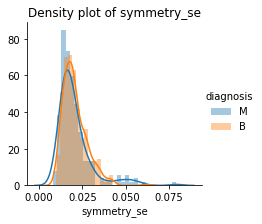

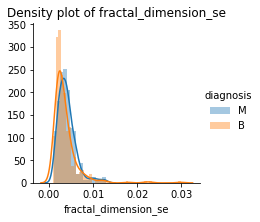

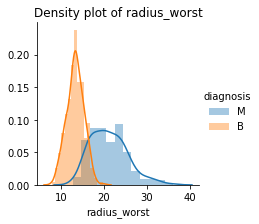

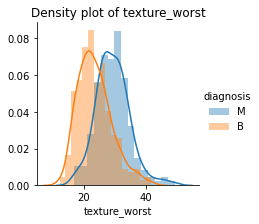

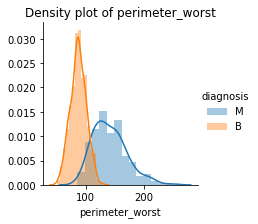

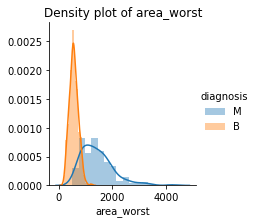

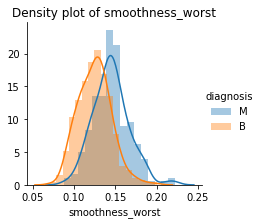

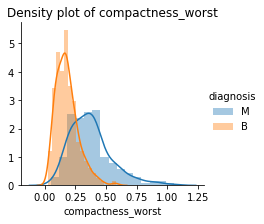

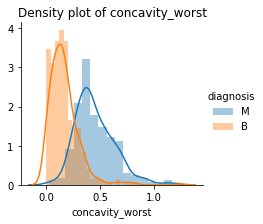

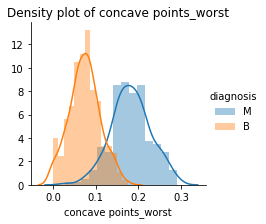

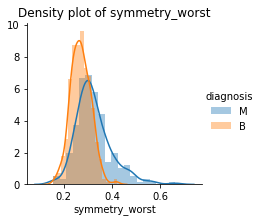

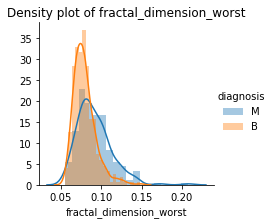

In [20]:
for i in df.columns:
    if i != 'diagnosis':
        col = colorSel()
        sns.FacetGrid(df, hue = 'diagnosis').map(sns.distplot, i).add_legend()
        plt.title('Density plot of '+i);
      #sns.distplot(df[i], color = col, kde =True);

In [21]:
# Outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

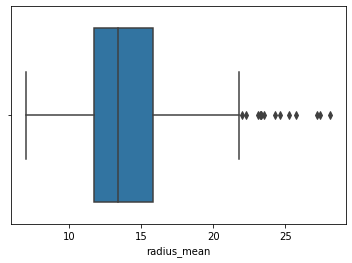

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

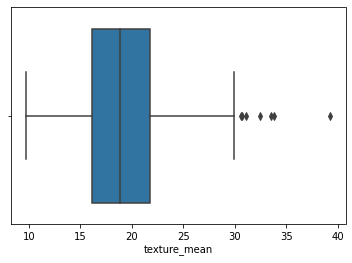

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

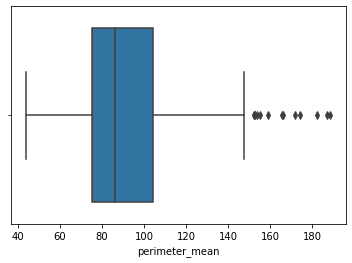

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

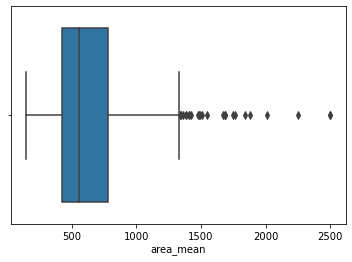

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

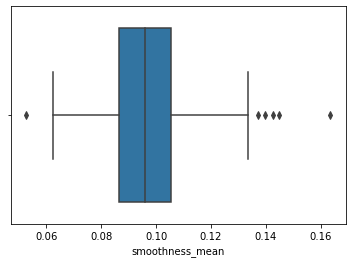

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

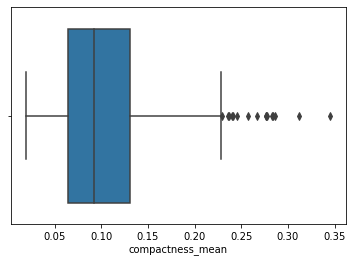

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

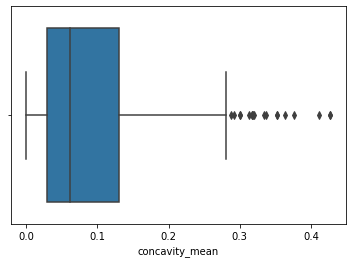

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

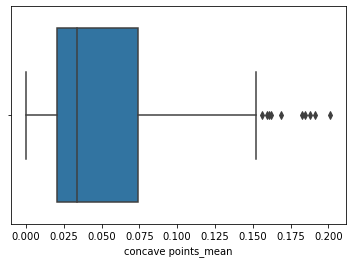

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

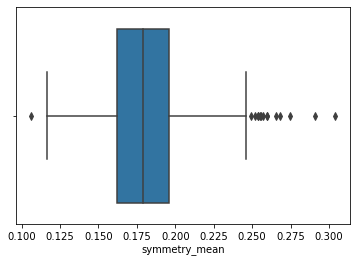

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

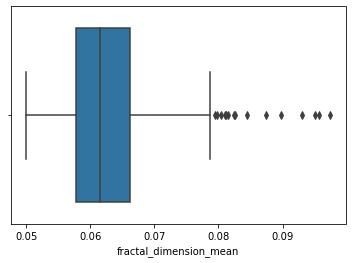

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

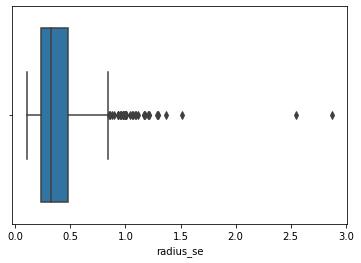

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

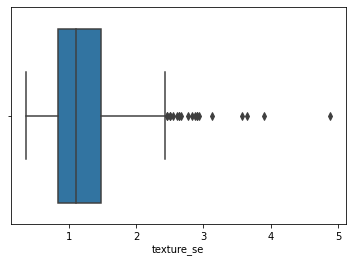

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

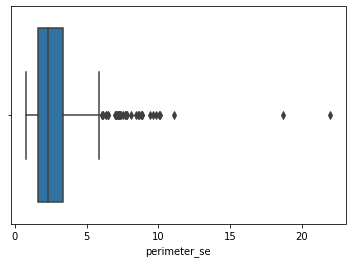

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

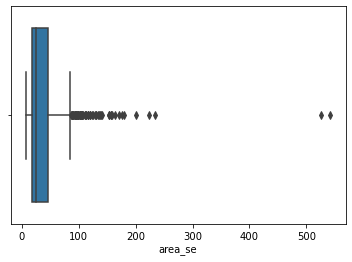

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

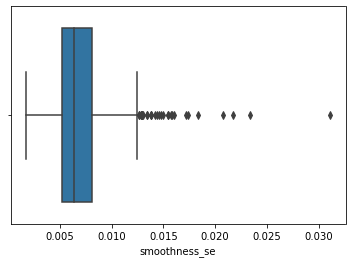

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

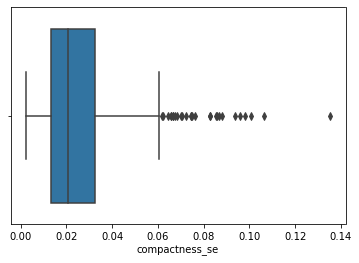

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

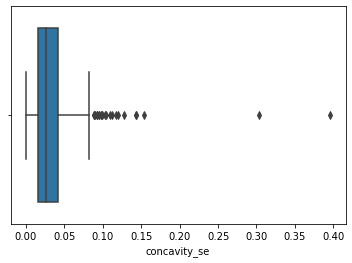

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

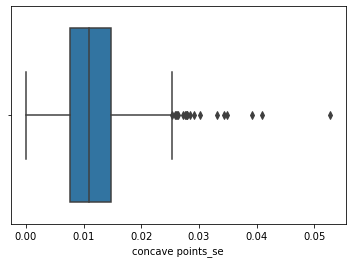

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

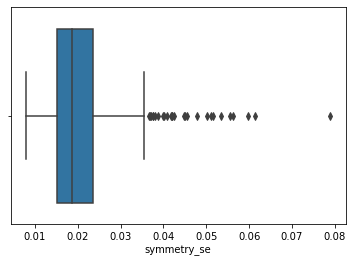

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

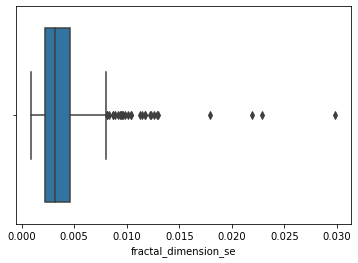

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

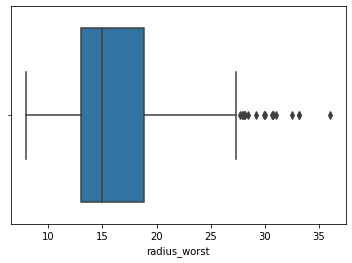

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

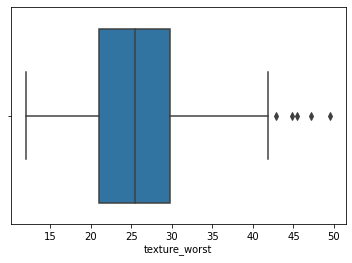

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

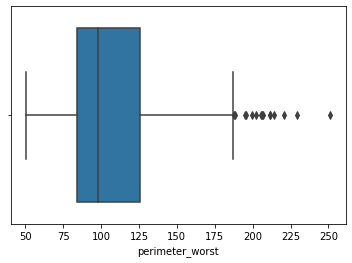

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

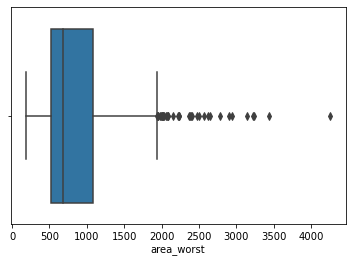

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

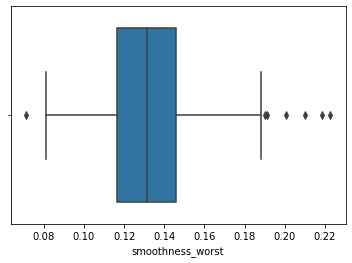

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

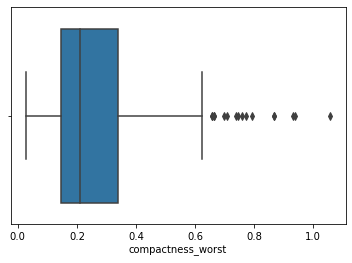

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

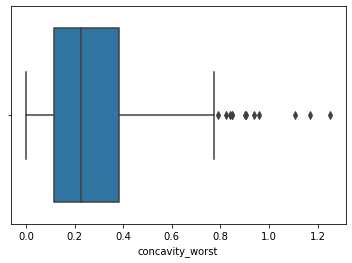

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

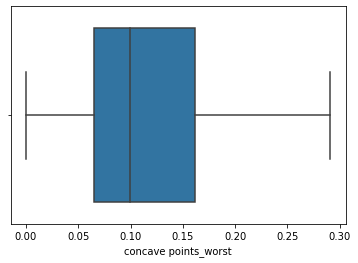

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

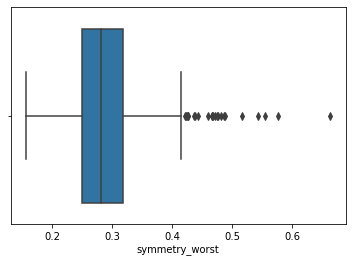

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

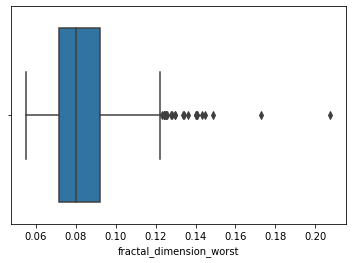

In [22]:
for i in df.columns:
    if i != 'diagnosis':
        sns.boxplot(x = i, data = df)
        plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

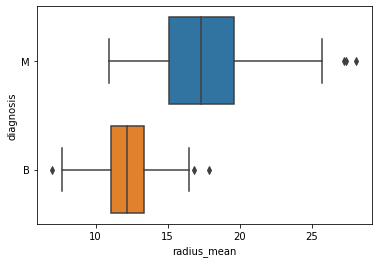

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

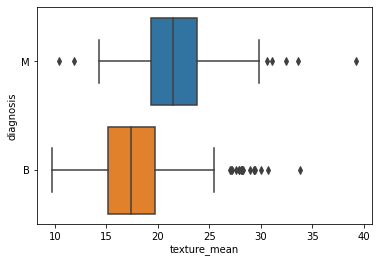

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

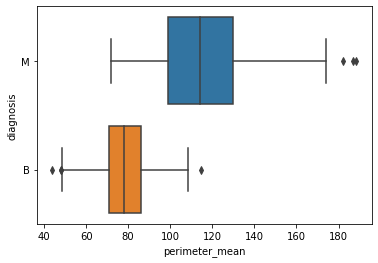

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

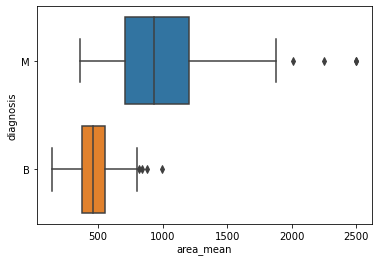

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

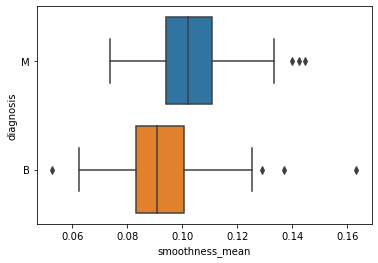

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

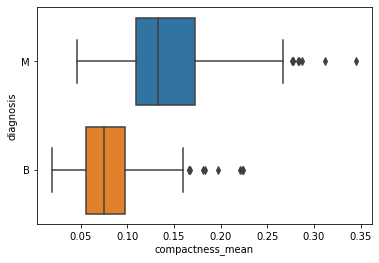

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

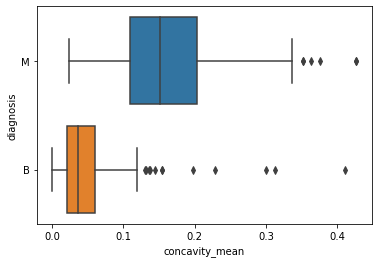

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

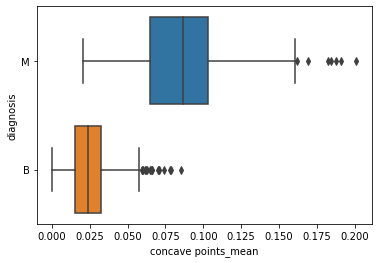

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

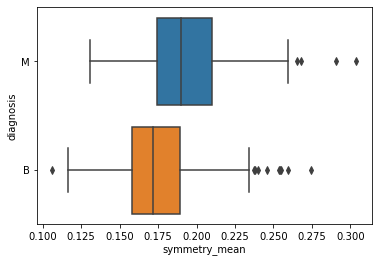

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

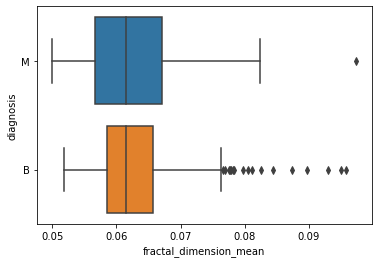

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

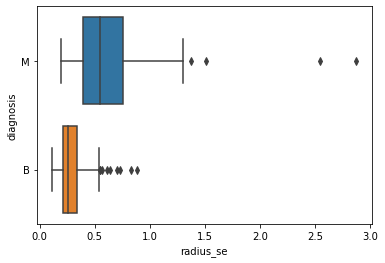

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

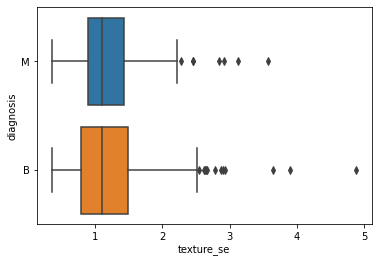

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

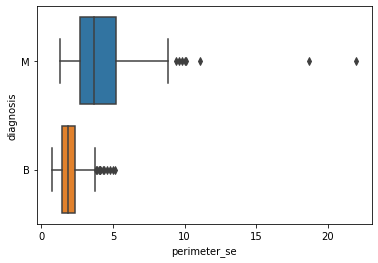

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

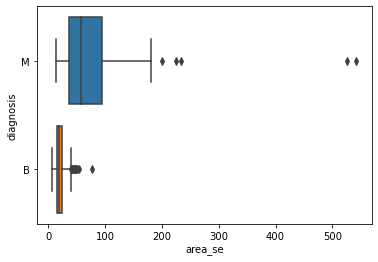

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

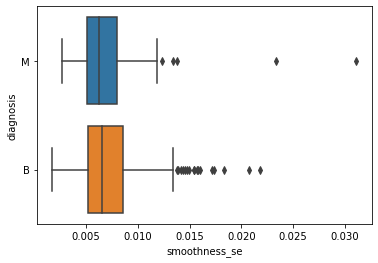

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

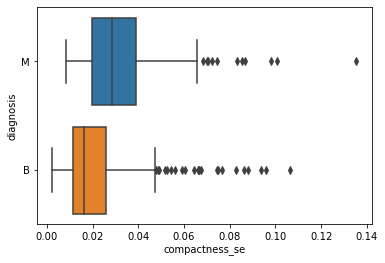

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

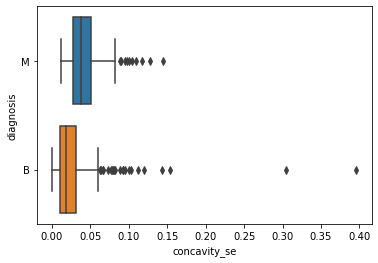

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

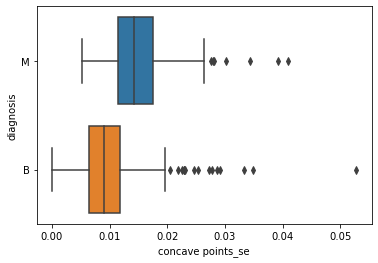

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

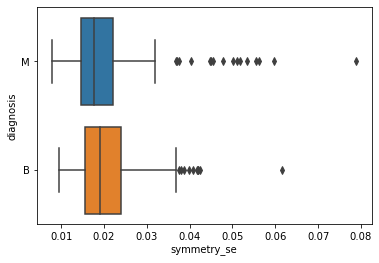

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

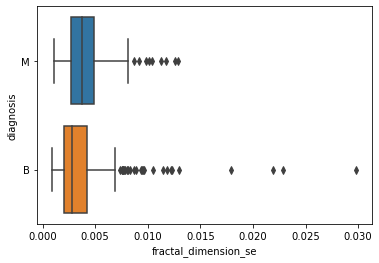

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

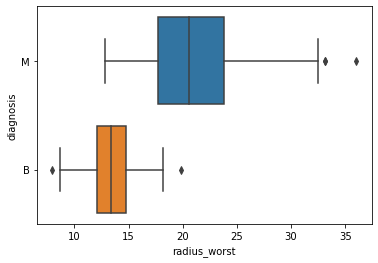

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

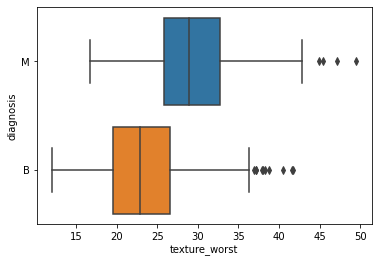

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

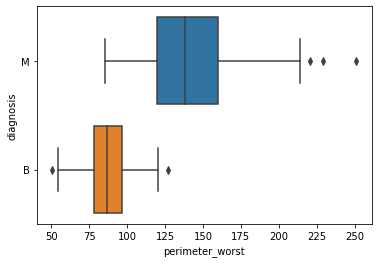

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

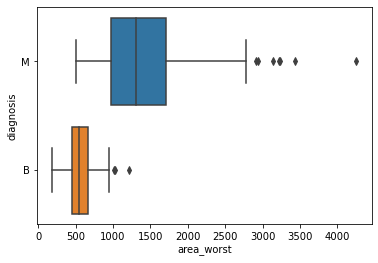

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

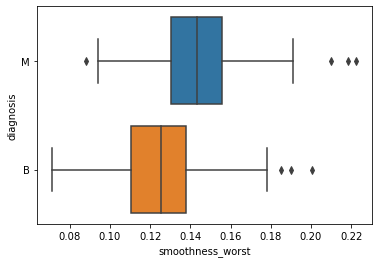

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

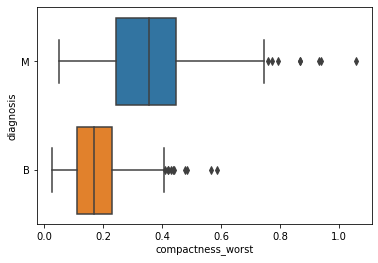

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

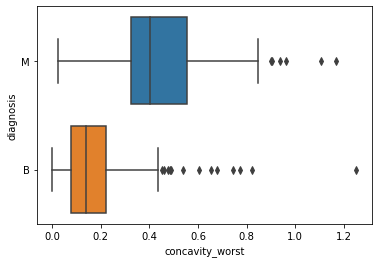

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

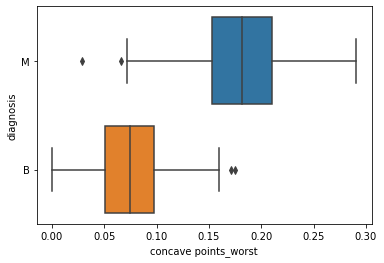

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

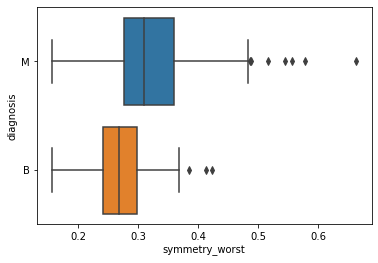

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

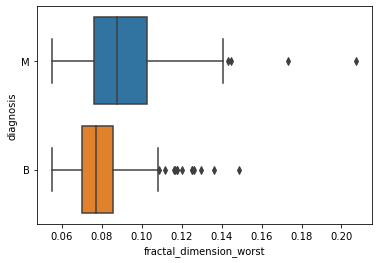

In [23]:
for i in df.columns:
    if i != 'diagnosis':
        sns.boxplot(df[i],y = 'diagnosis', data = df)
        plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

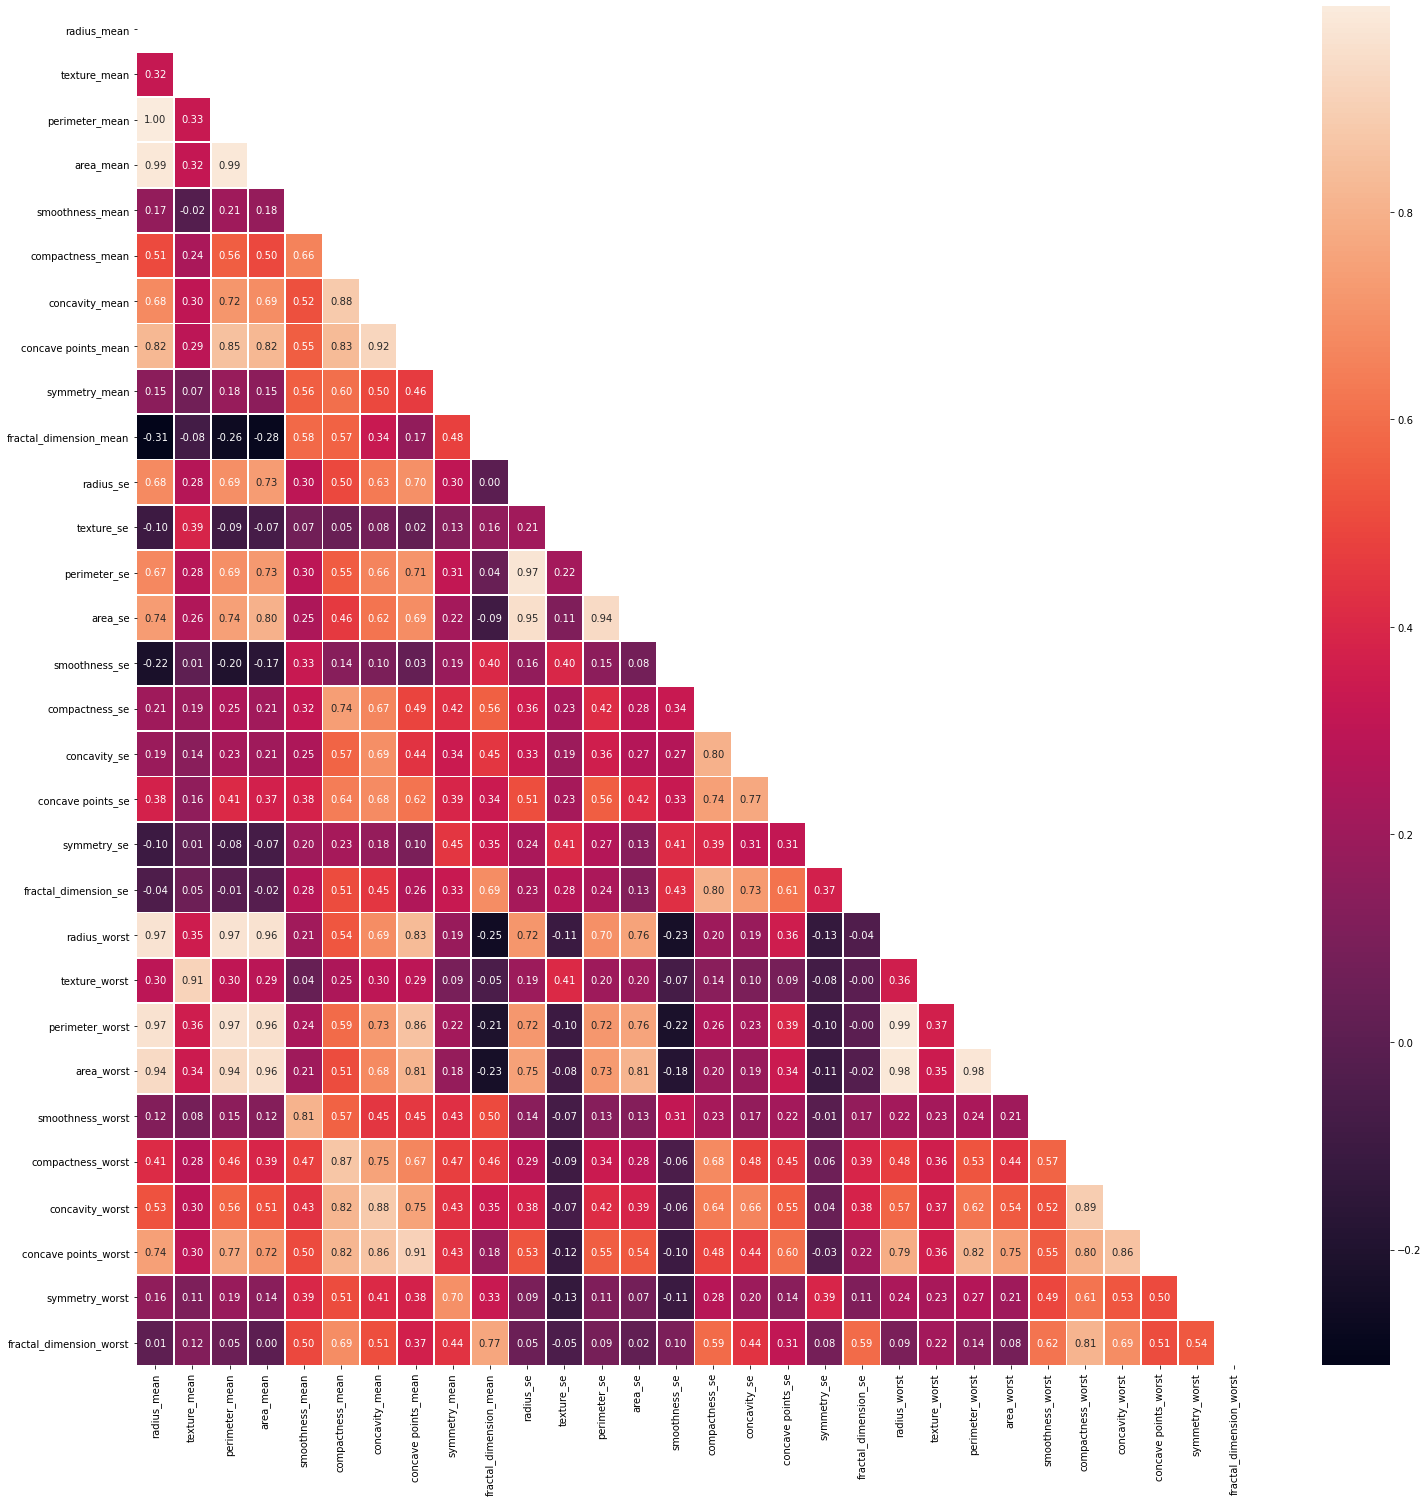

In [24]:
# plotting the corelation for the lower half

corr = df.corr()
upperD = np.triu(corr)
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, linewidths=0.8, fmt = '0.2f', mask = upperD)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

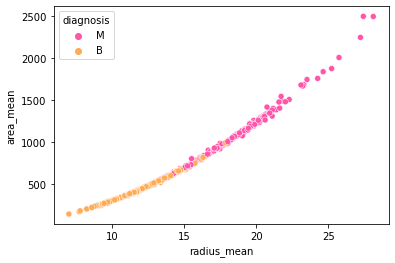

In [25]:
sns.scatterplot(x = 'radius_mean', y = 'area_mean',hue ='diagnosis', palette= 'spring',data = df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

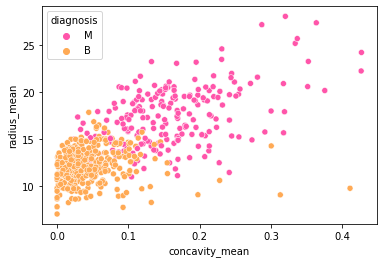

In [26]:
sns.scatterplot(x = 'concavity_mean', y = 'radius_mean',hue ='diagnosis', palette= 'spring',data = df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

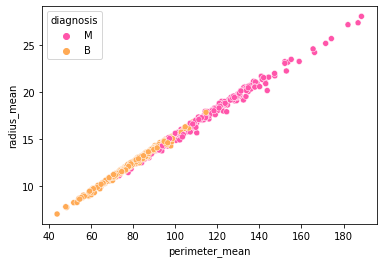

In [27]:
sns.scatterplot(x = 'perimeter_mean', y = 'radius_mean',hue ='diagnosis', palette= 'spring',data = df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

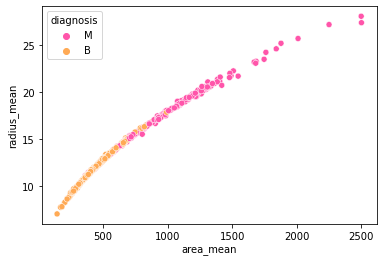

In [28]:
sns.scatterplot(x = 'area_mean', y = 'radius_mean',hue ='diagnosis', palette= 'spring',data = df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

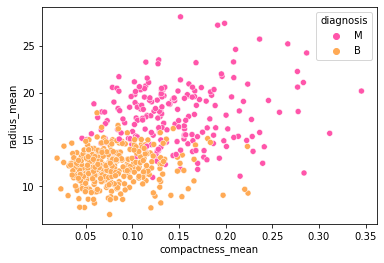

In [29]:
sns.scatterplot(x = 'compactness_mean', y = 'radius_mean',hue ='diagnosis', palette= 'spring',data = df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

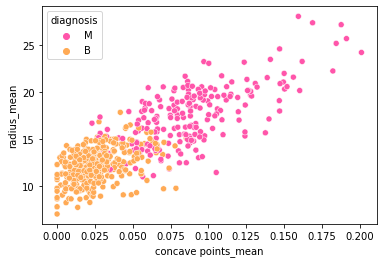

In [30]:
sns.scatterplot(x = 'concave points_mean', y = 'radius_mean',hue ='diagnosis', palette= 'spring',data = df)
plt.show()

***ENCODING FOR TARGET VARIABLE***

In [31]:
label_encoder = preprocessing.LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])

In [32]:
# M - means there is a cancer
# B- means there is no cancer

# M - 1
# B - 0

In [33]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

***Dividing the data to Independent and Dependent Variable***

In [34]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

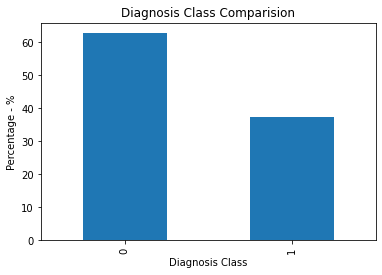

In [35]:
df['diagnosis'].value_counts(normalize = True).mul(100).plot(kind = 'bar');
plt.title('Diagnosis Class Comparision');
plt.xlabel('Diagnosis Class');
plt.ylabel('Percentage - %');

***DATA SPLIT***

In [36]:
# 30% of the data will be used as test and remaining 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
LR_Accuracy_List = []
DT_Accuracy_List = []
RF_Accuracy_List = []

# MODELS

***MODEL 1 - Logistic Regression***

In [38]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression();
lm.fit(X_train,y_train);

In [39]:
y_pred = lm.predict(X_test);

In [40]:
from sklearn.metrics import confusion_matrix
cm_LR = confusion_matrix(y_test, y_pred)
cm_LR

array([[107,   1],
       [  4,  59]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

LR_Accuracy_List.append(accuracy_score(y_test, y_pred))

Accuracy:  0.9707602339181286


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



***MODEL 2 - Decision Tree***

In [43]:
from sklearn.tree import DecisionTreeClassifier
clfDT = DecisionTreeClassifier();
clfDT.fit(X_train, y_train);

In [44]:
y_pred1 = clfDT.predict(X_test)

In [45]:
print('Accuracy: ', accuracy_score(y_test, y_pred1))

DT_Accuracy_List.append(accuracy_score(y_test, y_pred1))

Accuracy:  0.935672514619883


In [46]:
from sklearn.metrics import confusion_matrix
cm_DT = confusion_matrix(y_test, y_pred1)
cm_DT

array([[101,   7],
       [  4,  59]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



***MODEL 3 - Random Forest***

In [48]:
from sklearn.ensemble import RandomForestClassifier
clfRF = RandomForestClassifier();
clfRF.fit(X_train, y_train);

In [49]:
y_pred2 = clfRF.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred2))

RF_Accuracy_List.append(accuracy_score(y_test, y_pred2))

Accuracy:  0.9766081871345029


In [51]:
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_pred2)
cm_RF

array([[107,   1],
       [  3,  60]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



***Feature Selection - USING Random Forest Classifier***

In [53]:
# Print the name and gini importance of each feature
for feature in zip(X.columns, clfRF.feature_importances_):
    print(feature)

('radius_mean', 0.053266744080119575)
('texture_mean', 0.01635890806287612)
('perimeter_mean', 0.036425527438094636)
('area_mean', 0.0462375015647409)
('smoothness_mean', 0.005841194814960395)
('compactness_mean', 0.012037342799373671)
('concavity_mean', 0.0663229287791891)
('concave points_mean', 0.07612382316976775)
('symmetry_mean', 0.0037569316916956008)
('fractal_dimension_mean', 0.00427719287692483)
('radius_se', 0.03139957014384887)
('texture_se', 0.004221289506161073)
('perimeter_se', 0.01095811072396929)
('area_se', 0.0248399725967688)
('smoothness_se', 0.002926316908009133)
('compactness_se', 0.004184127317082956)
('concavity_se', 0.00665992300236061)
('concave points_se', 0.0045528959154373)
('symmetry_se', 0.004607017052079372)
('fractal_dimension_se', 0.0072180347046531396)
('radius_worst', 0.04175113483512818)
('texture_worst', 0.01445976598667545)
('perimeter_worst', 0.10390425952671847)
('area_worst', 0.15199227664647444)
('smoothness_worst', 0.012564051786202816)
('com

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

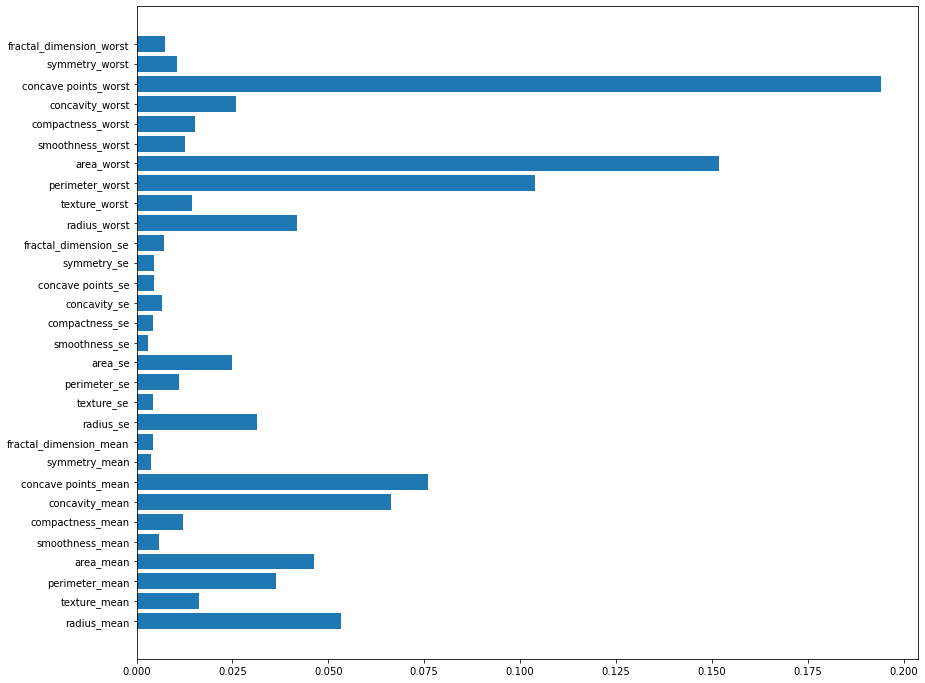

In [54]:
plt.figure(figsize = (14,12))
plt.barh(X.columns, clfRF.feature_importances_)
plt.show()

In [55]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.025
sfm = SelectFromModel(clfRF, threshold=0.025)

# Train the Feature selection Model
sfm.fit(X_train, y_train);

In [56]:
# Shows the important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

radius_mean
perimeter_mean
area_mean
concavity_mean
concave points_mean
radius_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst


In [57]:
X_train_imp = sfm.transform(X_train)
X_test_imp = sfm.transform(X_test)

In [58]:
print(X_train_imp.shape)
print(X_test_imp.shape)

(398, 10)
(171, 10)


***MODEL 4 - Logistic Regression - AFTER Selecting Important features using Random Forest Classifier***

In [59]:
lm1 = LogisticRegression()
lm1.fit(X_train_imp,y_train);

In [60]:
y_pred3 = lm1.predict(X_test_imp)

In [61]:
print('Accuracy: ', accuracy_score(y_test, y_pred3))

LR_Accuracy_List.append(accuracy_score(y_test, y_pred3))

Accuracy:  0.9824561403508771


In [62]:
from sklearn.metrics import confusion_matrix
cm_LR1 = confusion_matrix(y_test, y_pred3)
cm_LR1

array([[107,   1],
       [  2,  61]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



***MODEL 5 - Decission Tree - - AFTER Selecting Important features using Random Forest Classifier***

In [64]:
clfDT1 = DecisionTreeClassifier()
clfDT1.fit(X_train_imp,y_train);

In [65]:
y_pred4 = clfDT1.predict(X_test_imp)

In [66]:
print('Accuracy: ', accuracy_score(y_test, y_pred4))

DT_Accuracy_List.append(accuracy_score(y_test, y_pred4))

Accuracy:  0.9298245614035088


In [67]:
cm_DT1 = confusion_matrix(y_test, y_pred4)
cm_DT1

array([[101,   7],
       [  5,  58]], dtype=int64)

In [68]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       108
           1       0.89      0.92      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



***MODEL 6 - Random Forest - - AFTER Selecting Important features using Random Forest Classifier***

In [69]:
clfRF1 = RandomForestClassifier()
clfRF1.fit(X_train_imp,y_train)

RandomForestClassifier()

In [70]:
y_pred5 = clfRF1.predict(X_test_imp)

In [71]:
print('Accuracy: ', accuracy_score(y_test, y_pred5))

RF_Accuracy_List.append(accuracy_score(y_test, y_pred5))

Accuracy:  0.9649122807017544


In [72]:
cm_RF1 = confusion_matrix(y_test, y_pred5)
cm_RF1

array([[105,   3],
       [  3,  60]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [80]:
# ANOVA feature selection for numeric input and categorical output

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=2)

fs.fit(X_train, y_train);

In [81]:
# Shows the important features
for feature_list_index in fs.get_support(indices=True):
    print(X.columns[feature_list_index])

concave points_mean
concave points_worst


In [82]:
X_train_imp_A = fs.transform(X_train)
X_test_imp_A = fs.transform(X_test)

print(X_train_imp_A.shape)
print(X_test_imp_A.shape)

(398, 2)
(171, 2)


***MODEL 7 - Logistic Regression - AFTER Selecting Important features using Anova Method***

In [83]:
lm2 = LogisticRegression()
lm2.fit(X_train_imp_A,y_train);

In [84]:
y_pred6 = lm2.predict(X_test_imp_A)

In [85]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred6))

LR_Accuracy_List.append(accuracy_score(y_test, y_pred6))

Accuracy:  0.8421052631578947


In [86]:
cm_LF2 = confusion_matrix(y_test, y_pred6)
cm_LF2

array([[108,   0],
       [ 27,  36]], dtype=int64)

In [87]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       108
           1       1.00      0.57      0.73        63

    accuracy                           0.84       171
   macro avg       0.90      0.79      0.81       171
weighted avg       0.87      0.84      0.83       171



***MODEL 8 - Decission Tree - - AFTER Selecting Important features using ANOVA Select Feature***

In [89]:
clfDT2 = DecisionTreeClassifier()
clfDT2.fit(X_train_imp_A,y_train);

In [91]:
y_pred7 = clfDT2.predict(X_test_imp_A)

In [92]:
print('Accuracy: ', accuracy_score(y_test, y_pred7))

DT_Accuracy_List.append(accuracy_score(y_test, y_pred7))

Accuracy:  0.8830409356725146


In [93]:
cm_DT2 = confusion_matrix(y_test, y_pred7)
cm_DT2

array([[97, 11],
       [ 9, 54]], dtype=int64)

In [94]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       108
           1       0.83      0.86      0.84        63

    accuracy                           0.88       171
   macro avg       0.87      0.88      0.88       171
weighted avg       0.88      0.88      0.88       171



***MODEL 9 - Random Forest - - AFTER Selecting Important features using ANOVA SelectKBest***

In [95]:
clfRF2 = RandomForestClassifier()
clfRF2.fit(X_train_imp_A,y_train);

In [97]:
y_pred8 = clfRF2.predict(X_test_imp_A)

In [98]:
print('Accuracy: ', accuracy_score(y_test, y_pred8))

RF_Accuracy_List.append(accuracy_score(y_test, y_pred8))

Accuracy:  0.9064327485380117


In [99]:
cm_RF2 = confusion_matrix(y_test, y_pred8)
cm_RF2

array([[101,   7],
       [  9,  54]], dtype=int64)

In [100]:
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       108
           1       0.89      0.86      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



### Model Comparision

In [101]:
mDF = pd.DataFrame()

# append Model names and accuracy data
mDF['Data_Sel_Tech']  = ['Basic_Model','Imp_Feature_RF', 'ANOVA_SelectKBest']

<IPython.core.display.Javascript object>

In [102]:
mDF['Logistic Regression'] = LR_Accuracy_List

mDF['Decission Tree'] = DT_Accuracy_List

mDF['Random Forest'] = RF_Accuracy_List

In [103]:
mDF

,Data_Sel_Tech,Logistic Regression,Decission Tree,Random Forest
0,Basic_Model,0.970760,0.935673,0.976608
1,Imp_Feature_RF,0.982456,0.929825,0.964912
2,ANOVA_SelectKBest,0.842105,0.883041,0.906433


In [77]:
# # Dropping the features which has more colreation

# corr_matrix = df.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
#to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'fractal_dimension_worst']